# Predictive Model for Profit calculations

## Installing necessary packages

In [ ]:
#pip install seaborn
#pip install numpy
#pip install matplotlib
#pip install sklearn
#pip install pandas

## Importing the required libraries

In [ ]:
# Pandas and numpy for intracting with dataset
import pandas as pd
import numpy as np

# Matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams

# Sklearn for predictive modeling
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Setting up visualizations
%matplotlib inline
rcParams['figure.figsize']=20,10

## Reading the dataset using pandas

In [ ]:
# Reading the csv file
df=pd.read_csv("C:\\Users\\Administrator\\Desktop\\internship\\50_StartupsBackup.csv")

In [ ]:
# Getting an overview
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## Summarizing the data

In [ ]:
# Summarizing the dataset
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Preprocessing Data

In [ ]:
# Checking the Dimensions
print('There are ',df.shape[0],'rows and ',df.shape[1],'columns in the dataset.')

There are  50 rows and  4 columns in the dataset.


## Checking null and duplicate values

In [ ]:
# Checking for Duplicate values using duplicated() pre-defined function
print('There are',df.duplicated().sum(),'duplicate values in the dateset.')

There are 0 duplicate values in the dateset.


In [ ]:
# Checking for null values using isnull() and sum functions
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

## Visualizing the correlations

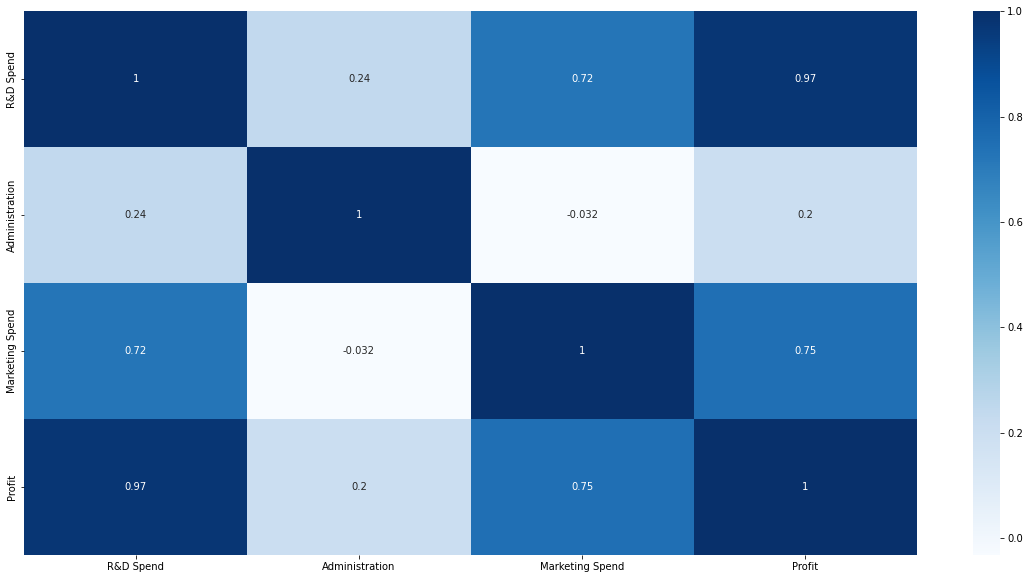

In [ ]:
# Plotting correlations
sns.heatmap(df.corr(), annot=True,cmap="Blues")
plt.show()

## Outliers Detection

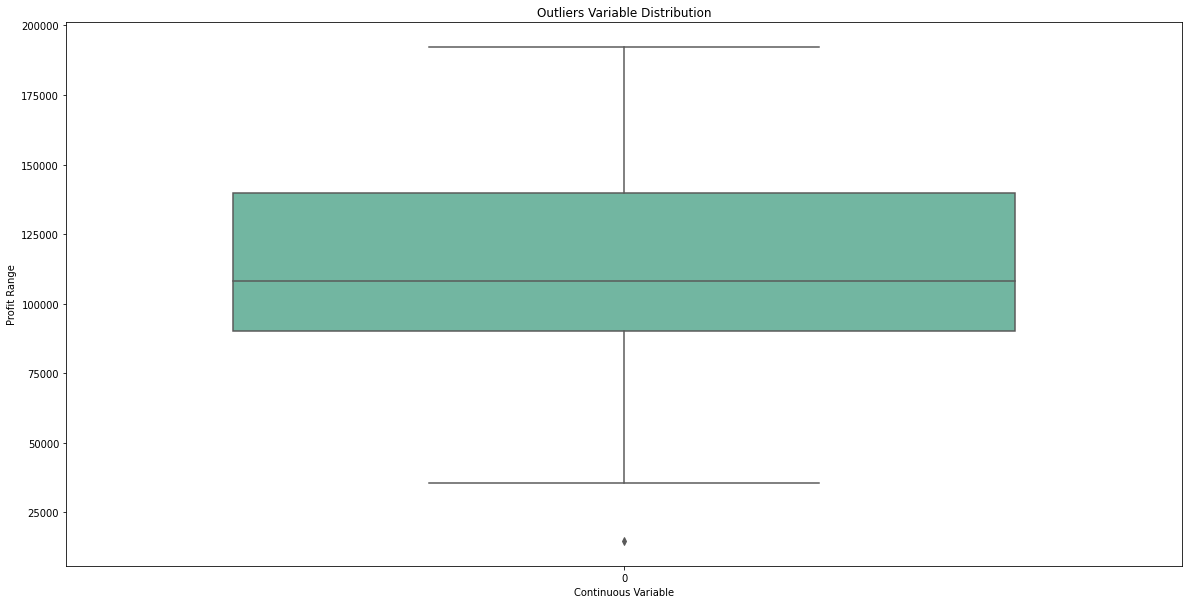

In [ ]:
# Plotting Box Plot 
sns.boxplot(data=df["Profit"], orient="v", palette="Set2" , width=0.7)
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

There some outliers but as the data has 50 rows it will not affect the calculations and predictions.

## Density graph

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


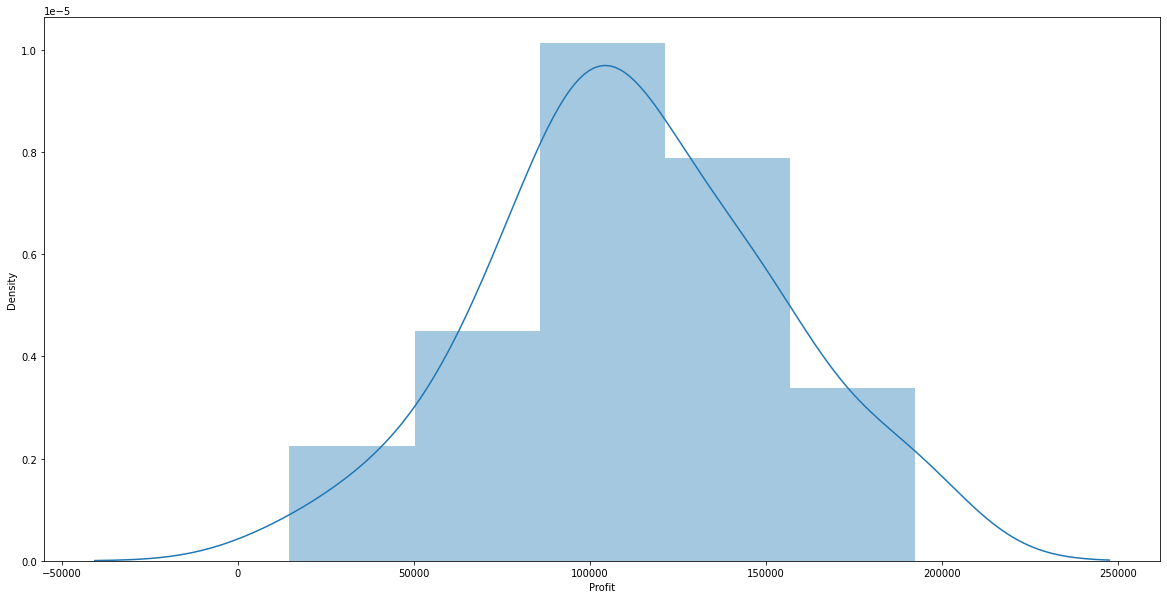

In [ ]:
# Plotting the density plot for checking skewness
sns.distplot(df['Profit'],bins=5,kde=True)
plt.show()

The average profit is the most frequent i.e. this should be in the category of distribution plot.

## Pair Plot

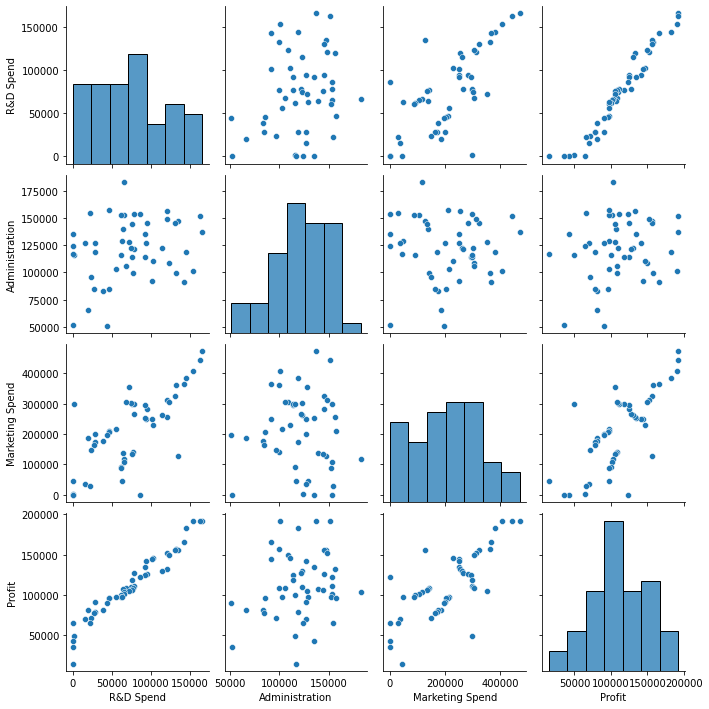

In [ ]:
sns.pairplot(df)
plt.show()


From the pair pot we can observe that:
1. R&D Spend is directly proportional to the investment that we can do.
2. The marketing spend seems to be directly proportional with the profit (except some outliers).
3. There is no relationship between the second column and profit.

## Test and Train Data Split

### Splitting the data into Test and Train sets

In [ ]:
# Defining and seperating target variable
x = df[["R&D Spend", "Administration", "Marketing Spend"]]
y = df["Profit"]

# Reshaping the target and independent variable
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

# Splitting the test and train dataset
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

### Training a predictive model

In [ ]:
# Defining the regression model
model = LinearRegression()

# Fitting and training the model
model.fit(xtrain, ytrain)

LinearRegression()

### Printing the Intercept and Coefficient values of model

In [ ]:
print('Intercept value: ',model.intercept_)
print('Coefficient values: ',model.coef_)

Intercept value:  [54071.87574599]
Coefficient values:  [[ 0.80377928 -0.06792917  0.03124155]]


### Predicting the values

In [ ]:
# Predicting the model
ypred = model.predict(xtest)

In [ ]:
# Converting the predicted values into a dataframe
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})
print(data.head())

   Predicted Profit
0     126703.027165
1      84894.750816
2      98893.418160
3      46501.708150
4     129128.397344


### Printing the values

In [ ]:
# Noticing the values and differences using dataframe
df_preds = pd.DataFrame({'Actual': ytest.squeeze(), 'Predicted': ypred.squeeze(), 'Difference':ytest.squeeze()-ypred.squeeze()})
print(df_preds)

      Actual      Predicted    Difference
0  134307.35  126703.027165   7604.322835
1   81005.76   84894.750816  -3888.990816
2   99937.59   98893.418160   1044.171840
3   64926.08   46501.708150  18424.371850
4  125370.37  129128.397344  -3758.027344
5   35673.41   50992.694863 -15319.284863
6  105733.54  109016.553658  -3283.013658
7  107404.34  100878.464145   6525.875855
8   97427.84   97700.596386   -272.756386
9  122776.86  113106.152922   9670.707078


### Plotting Regression plots of model

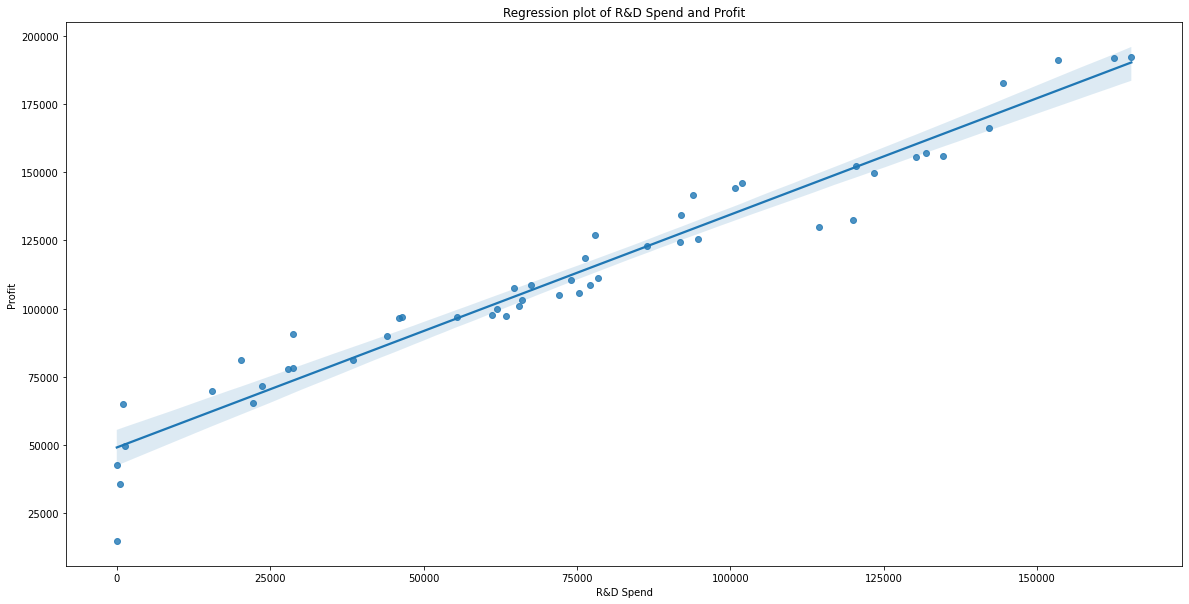

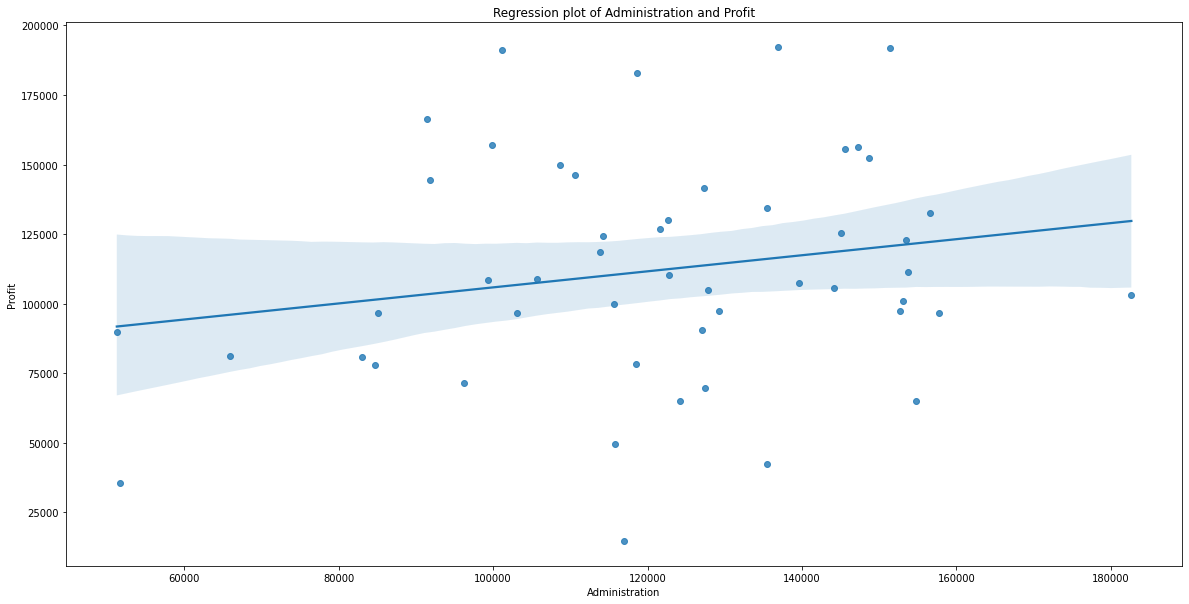

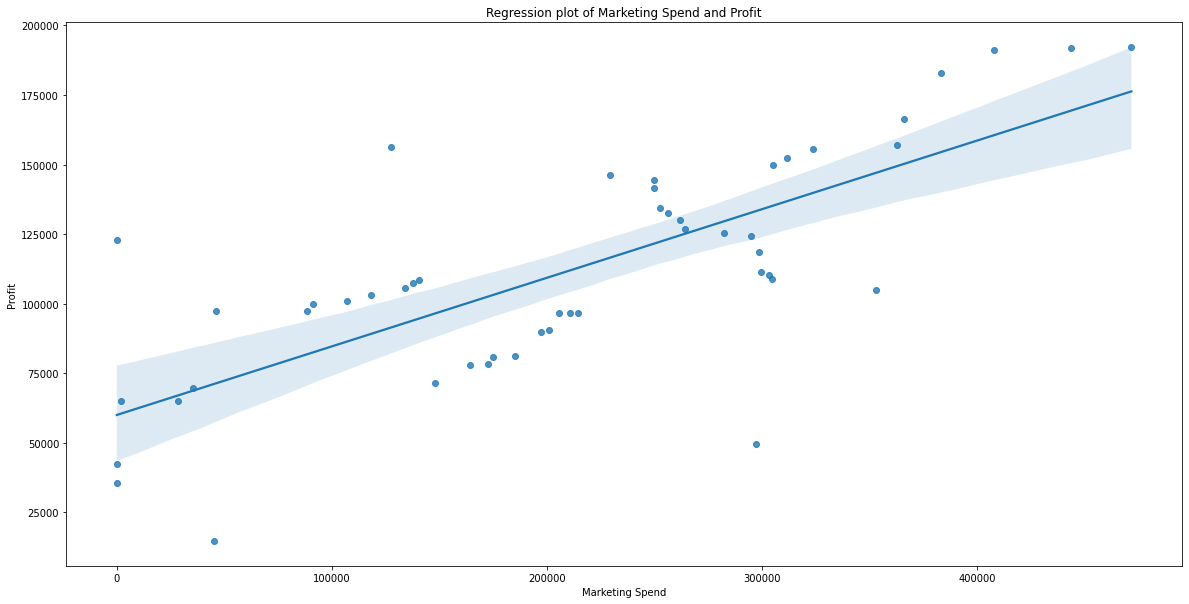

In [ ]:
variables = ["R&D Spend","Administration","Marketing Spend"]
for var in variables:
    # Creating a rectangle (figure) for each plot
    plt.figure()
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Profit', data=df).set(title=f'Regression plot of {var} and Profit');

### Calculating values of our model

In [ ]:
mae = metrics.mean_absolute_error(ytest, ypred)
mse = metrics.mean_squared_error(ytest, ypred)

### Printing the values

In [ ]:
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",mse**(0.5))

Mean Absolute Error:  6979.152252370402
Mean Squared Error:  80926321.22295162
Root Mean Squared Error:  8995.905803361416


### Calculating r2_score

In [ ]:
r2Score = metrics.r2_score(ypred, ytest)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 88.65921975655436
